In [ ]:
# Origem dos dados:
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introdução aos dados

*   Date: Contém datas no formato (AAAA-MM-DD). O início é no ano de 1750, para temperatura média da superfície da Terra e 1850, para temperatura máxima e mínima da superfície da Terra e oceanos.  

**Observação: Para todos os dados colunares abaixo há uma coluna adjacente que indica o intervalo de confiança de 95% ao redor da média.**

*    LandAverageTemperature
*    LandMaxTemperature
*    LandMinTemperature
*    LandAndOceanAverageTemperature

In [ ]:
import pandas as pd
import numpy as np

df_cidade  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GlobalLandTemperaturesByCity.csv')
df_pais    = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GlobalLandTemperaturesByCountry.csv')
df_mcidade = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GlobalLandTemperaturesByMajorCity.csv')
df_estado  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GlobalLandTemperaturesByState.csv')
df_global  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GlobalTemperatures.csv')

dados_globais = df_pais
df_pais = pd.DataFrame(data = df_pais)

df_pais['AverageTemperature'] = df_pais['AverageTemperature'].astype('float')
df_pais['AverageTemperatureUncertainty'] = df_pais['AverageTemperatureUncertainty'].astype('float')
df_pais['Country'] = df_pais['Country'].astype('category')
df_pais['dt'] = df_pais['dt'].astype('object')

# Datas estão no formato String, AAAA-MM-DD, converto para colunas independentes
# coloquei as colunas em português para ficar distinto dos dados originais
df_pais['Ano'] = df_pais['dt'].apply(lambda x: int(x[:4])).astype('int')
df_pais['Mes'] = df_pais['dt'].apply(lambda x: int(x[5:7])).astype('int')
df_pais['Dia'] = df_pais['dt'].apply(lambda x: int(x[-2:])).astype('int')

df_pais.dtypes

dt                                 object
AverageTemperature                float64
AverageTemperatureUncertainty     float64
Country                          category
Ano                                 int64
Mes                                 int64
Dia                                 int64
dtype: object

In [ ]:
df_pais.describe()

,AverageTemperature,AverageTemperatureUncertainty,Ano,Mes,Dia
count,544811.000000,545550.000000,577462.000000,577462.000000,577462.0
mean,17.193354,1.019057,1908.819188,6.496098,1.0
std,10.953966,1.201930,65.916942,3.450693,0.0
min,-37.658000,0.052000,1743.000000,1.000000,1.0
25%,10.025000,0.323000,1862.000000,3.000000,1.0
50%,20.901000,0.571000,1914.000000,6.000000,1.0
75%,25.814000,1.206000,1964.000000,9.000000,1.0
max,38.842000,15.003000,2013.000000,12.000000,1.0


In [ ]:
df_pais = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GlobalLandTemperaturesByCountry.csv')
df_pais = pd.DataFrame(data = df_pais)

df_pais['AverageTemperature'] = df_pais['AverageTemperature'].astype('float')
df_pais['AverageTemperatureUncertainty'] = df_pais['AverageTemperatureUncertainty'].astype('float')
df_pais['Country'] = df_pais['Country'].astype('category')
df_pais['dt'] = df_pais['dt'].astype('object')

In [ ]:
mapa1_temp_med = pd.DataFrame(df_pais.groupby('Country')['AverageTemperature'].mean())
mapa1_temp_med = mapa1_temp_med.reset_index()

# Por algum problema de caractere o país "Åland" está em último,
# colocamos ele na posição correta que deveria ser a 0.

mapa1_temp_med = mapa1_temp_med[len(mapa1_temp_med)-1:len(mapa1_temp_med)+1].append(mapa1_temp_med)
mapa1_temp_med = mapa1_temp_med[:-1]
mapa1_temp_med.reset_index(drop=False,inplace=True)
mapa1_temp_med

,index,Country,AverageTemperature
0,242,Åland,5.291383
1,0,Afghanistan,14.045007
2,1,Africa,24.074203
3,2,Albania,12.610646
4,3,Algeria,22.985112
...,...,...,...
238,237,Virgin Islands,26.336523
239,238,Western Sahara,22.319818
240,239,Yemen,26.253597
241,240,Zambia,21.282956


In [ ]:
import plotly.graph_objects as go
# Documentação: https://plotly.com/python/choropleth-maps/

mapa_df = pd.DataFrame(data={'Pais': df_pais['Country'].unique(), 'Temperatura Media': mapa1_temp_med['AverageTemperature']})

figChoro = go.Figure(data = go.Choropleth(
                locations = mapa_df['Pais'],
                z = mapa_df['Temperatura Media'],
                colorscale = 'Reds',
                locationmode = 'country names',
                colorbar_title = 'Temperatura<br> em °C',
                autocolorscale=False
                ))
figChoro.update_geos(projection_type = 'equirectangular', 
                showcountries=True,
                )
figChoro.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})

figChoro.show()

In [ ]:
# Mapa com dados das maiores cidades da América do Sul
df_SA = df_mcidade

SA_paises = set(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'])

df_SA['Country'] = df_SA['Country'].astype('category')

# Filtrando cidades sulamericanas por países na lista
df_SA = df_SA[df_SA['Country'].isin(SA_paises)]

# Dado que o pandas está alarmando um SettingWithCopyWarning, 
# para maior legibilidade de output, eu o removo
pd.options.mode.chained_assignment = None

# Copiando Latitude e Longitude para novas colunas para tratar char indesejado
# Coordenadas ao Sul e Oeste são negativas
df_SA['Lat'] = df_SA['Latitude'].apply(lambda x: float(x[:-1]) if x.endswith('N') else float(x[:-1])*-1).astype('float')
df_SA['Long'] = df_SA['Longitude'].apply(lambda x: float(x[:-1]) if x.endswith('E') else float(x[:-1])*-1).astype('float')

SA_cidades = df_SA.groupby('City')
SA_cidades.mean()

,AverageTemperature,AverageTemperatureUncertainty,Lat,Long
City,,,,
Belo Horizonte,21.071396,0.895210,-20.09,-44.36
Bogotá,20.002265,0.708414,4.02,-74.73
Brasília,21.727595,0.857786,-15.27,-47.50
Cali,21.797027,0.710104,4.02,-76.34
Fortaleza,27.008640,0.775052,-4.02,-40.98
Lima,16.769120,0.825333,-12.05,-77.26
Rio De Janeiro,23.788916,0.974875,-23.31,-42.82
Salvador,24.656971,0.864981,-13.66,-38.81
Santiago,5.692277,0.722668,-32.95,-69.89


In [ ]:
# Calcular temperaturas médias por cidade

# Documentação: https://plotly.com/python/scatter-plots-on-maps/

SA_temp_med = SA_cidades.mean()

# Valores 'City' do groupby acima
SA_temp_med['Cidades'] = np.array(SA_temp_med[[]].index.values)

# Cidade concatenada Temperatura para cada balão informativo no mapa
SA_temp_med['Texto'] = SA_temp_med['Cidades'].str.cat(SA_temp_med['AverageTemperature'].astype(str), sep=': ').astype('object')

figSouthAmerica = go.Figure(data=go.Scattergeo(
        lon = SA_temp_med['Long'],
        lat = SA_temp_med['Lat'],
        text = SA_temp_med['Texto'],
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 1.0,
            colorscale = 'Reds',
            cmin = SA_temp_med['AverageTemperature'].min()-10,
            color = SA_temp_med['AverageTemperature'],
            cmax = SA_temp_med['AverageTemperature'].max(),
            colorbar_title='Temperaturas<br> em °C'
        )
        ))

figSouthAmerica.update_layout(
        title = 'Temperatura nas maiores cidades da América do Sul',
        geo_scope='south america',
        )

figSouthAmerica.show()

In [ ]:
# Vendo quais países faltam mais dados
filtro_SA = df_pais[df_pais['Country'].isin(SA_paises)]
filtro_SA['AverageTemperature'].isnull().sum()

nulos_SA = filtro_SA[filtro_SA['AverageTemperature'].isnull()]

nulos_SA['Country'].value_counts().head(len(SA_paises))

Peru         310
Colombia     200
Suriname     199
Guyana       199
Venezuela    191
Ecuador      186
Uruguay       85
Paraguay      85
Brazil        17
Bolivia        1
Chile          1
Argentina      1
Name: Country, dtype: int64

In [ ]:
# Vendo quantas cidades faltam dados
df_SA['AverageTemperature'].isnull().sum()

1401

## Inserindo dados ausentes em uma coluna usando a média como referência
Podemos usar o dataframe com dados de países 
para alimentar os dados ausentes e estipular a temperatura de um país. 
Por exemplo, Equador está geograficamente
entre Colômbia e Peru, logo podemos estimar que as 
temperaturas dele serão uma média.


In [ ]:
equador  = df_pais[df_pais['Country'] == 'Ecuador']
colombia = df_pais[df_pais['Country'] == 'Colombia']
peru     = df_pais[df_pais['Country'] == 'Peru']

print('Antes: ', equador['AverageTemperature'].isnull().sum())

equador_fill['AverageTemperature'] = equador['AverageTemperature'].fillna((equador['AverageTemperature'].mean()+colombia['AverageTemperature'].mean())/2)

print('Depois: ', equador_fill['AverageTemperature'].isnull().sum())

Antes:  186
Depois:  0


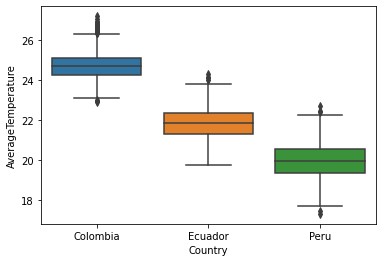

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_3_paises = df_pais[df_pais['Country'].isin(['Colombia', 'Peru', 'Ecuador'])]

# Removendo duas colunas e categorias desnecessárias
dados_3_paises.drop(columns=['AverageTemperatureUncertainty', 'dt'], axis=1, inplace=True)
dados_3_paises.Country.cat.remove_unused_categories(inplace=True)

sns.boxplot(x="Country", y="AverageTemperature", data=dados_3_paises)

plt.show()

### Resultado
Como esperado, vemos que as temperaturas do Equador estão entre 
as temperaturas da Colombia e Peru, <br>com maior proximidade as 
temperaturas do Peru. <br> Também podemos observar que há muitos 
outliers para temperatura máxima no gráfico da Colômbia.<br>Não há 
outliers para temperatura mínina no Ecuador. <br>Temos outliers tanto
para mínimo como para máximo para o Peru. 

,AverageTemperature,Country
114732,25.010,Colombia
114733,24.709,Colombia
114734,25.060,Colombia
114735,24.688,Colombia
114736,24.284,Colombia
...,...,...
411687,20.172,Peru
411688,19.312,Peru
411689,18.544,Peru
411690,19.163,Peru


### Plotar gráfico comparando mês antes e mês depois da inserção dos dados ausentes

### Usando KNN para imputação
 Vamos usar o KNN para preencher valores inexistentes do Equador. <br> 
 Considerando que existem poucos dados faltando, posso colocar um K = 5.
 
 
 Ideia(Temos dados de cidades destes países e nenhuma
 cidade do Equador, logo podemos estimar a temp.
 de Quito, Equador.)

In [ ]:
from fancyimpute import KNN

# Input precisa de um array 2D
# equador_knn = KNN(k=5).fit_transform(equador['AverageTemperature'])
# equador_knn.shape

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



### Fazendo a normalização dos dados

Dado que nossos dados estão num range pequeno em torno de X e Y
utilizamos da ferramenta de normalização MinMax do Scikitlearn 
para fazer a normalização

In [ ]:
# Normalizando usando min-max do scikit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
MinMax_scaler = MinMaxScaler()

# Input precisa de um array 2D
# equador['Normalizado MM'] = MinMax_scaler.fit_transform(equador['AverageTemperature'])
# equador['Normalizado MM']

# Normalizando usando média e desvio-padrão
# equador['Normalizado MDP'] = (equador['AverageTemperature'] - equador['AverageTemperature'].mean()) / equador['AverageTemperature'].std()

### Fazendo a discretização 
Normalmente temos 4 estações mais ou menos definidas, decidi então dividir usando o 4-percentilcom isso podemos ver se as diferenças climáticas no Equador são grandes ou não.

In [ ]:
# Para garantir que não há dados faltando nos quartis,
# uso o Data-Frame preenchido com a média
equador_fill['Discretizado'] = pd.qcut(equador_fill['AverageTemperature'], 4)
equador_fill['Discretizado']

151133    (19.767999999999997, 21.397]
151134                (21.397, 21.991]
151135                (21.397, 21.991]
151136                (22.606, 24.336]
151137    (19.767999999999997, 21.397]
                      ...             
152899                (21.991, 22.606]
152900                (21.397, 21.991]
152901    (19.767999999999997, 21.397]
152902                (21.397, 21.991]
152903                (22.606, 24.336]
Name: AverageTemperature, Length: 1771, dtype: category
Categories (4, interval[float64]): [(19.767999999999997, 21.397] < (21.397, 21.991] < (21.991, 22.606] <
                                    (22.606, 24.336]]

In [ ]:
equador_fill['AverageTemperature'].quantile(0.75)-equador_fill['AverageTemperature'].quantile(0.25)

1.208999999999996

#### Resultado da análise
A partir do que foi observado acima, podemos perceber que 
o Equador tem temperaturas que variam entre 19.76°C e 24.33°C.
A diferença dos valores no 2-quartil e 3-quartil é bastante pequena (< 1.5°C),
logo, podemos dizer que o Equador possui um clima estável durante a maior parte do ano.


### Histórias:
Qual o melhor mês para visitar o inverno chileno? <br>
Cidades brasileiras que se parecem com outras capitais sulamericanas <br>
Qual país mais afetado pelo aquecimento global na América Latina? <br>
Usar dados que cidades faltam para aplicar o KNN <br>
